# Proyecto primer bimestre
## Kevin Mendoza

## INTRODUCCION
### El presente proyecto de analisis de datos con python trata sobre lo siguiente, se obtuvo un archivo csv que contiene datos de hombres en donde se puede encontrar su fecha de nacimiento, provncia y canton donde nacio, su edad, su estado civil, la cantidad de hijos que tiene esta persona, esos son los campos principales que se usaran, pero este archivo contienen mas campos.

## DESARROLLO
### Para realizar este proyecto se usaran las siguientes librerías.

In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt

### El archivo csv se encuentra en la siguiente direccion, este se lo guardara en el siguiente path.

In [2]:
path = "D://kevin//poli//actualizacion//python//proyecto//proyecto.csv"

### Al dataframe de prueba se lo usara de la siguiente manera.

In [3]:
df_prueba = pd.read_csv(path,  encoding = 'unicode_escape',sep = ";")

### Como se explico anteriormente en la introduccion, se usaran los siguientes campos.

In [4]:
columnas = ['prov_insc','cant_insc','hijos_rec',
            'anio_nach','mes_nach','dia_nach',
            'edad_hom','est_civih']

### Se tendra un nuevo dataframe que usara las columnas definidas anteriormente.

In [5]:
df_prueba2 = pd.read_csv(path,  encoding = 'unicode_escape',sep = ";", usecols=columnas)

### Para continuar se guardara en un pickle, con la siguiente configuracion.

In [6]:
path_guardado_pickle = "D://kevin//poli//actualizacion//python//proyecto//proyecto.pickle"

df_prueba2.to_pickle(path_guardado_pickle)

df_pickle = pd.read_pickle(path_guardado_pickle)

df = df_pickle.iloc[1:1000,:].copy()

### y para finalizar y poder realizar el analisis se creara el xlsx del proyecto.

In [7]:
df.to_excel('D://kevin//poli//actualizacion//python//proyecto//mi_proyecto.xlsx')

### Para poder ver lo que contiene nuestro dataframe y poder continuar con el analiis, usaremos la siguiente linea.

In [8]:
df.head()

,prov_insc,cant_insc,hijos_rec,anio_nach,mes_nach,dia_nach,edad_hom,est_civih
1,Bolívar,Guaranda,2,1983,Septiembre,25,33,Soltero
2,Bolívar,Caluma,3,1983,Marzo,2,33,Soltero
3,Bolívar,Caluma,2,1982,Octubre,30,34,Soltero
4,Manabí,Montecristi,0,1957,Septiembre,18,59,Viudo
5,Santa Elena,Salinas,1,1990,Julio,4,26,Divorciado


### Para poder observar en una tabla varios ejemplos se lo realiza de la siguiente manera; por ejemplo: hombres con estado civil viudos

In [9]:
df[df.est_civih=='Viudo']

,prov_insc,cant_insc,hijos_rec,anio_nach,mes_nach,dia_nach,edad_hom,est_civih
4,Manabí,Montecristi,0,1957,Septiembre,18,59,Viudo
85,Chimborazo,Cumandá,0,1978,Noviembre,13,38,Viudo
202,Guayas,Guayaquil,0,1965,Marzo,8,52,Viudo
255,Guayas,Guayaquil,0,1944,Noviembre,7,72,Viudo
340,Carchi,Tulcán,0,1957,Mayo,14,60,Viudo
357,Esmeraldas,Esmeraldas,3,1937,Agosto,4,79,Viudo
420,Santo Domingo de los Tsáchilas,Santo Domingo,0,1954,Julio,1,62,Viudo
436,Galápagos,San Cristóbal,1,1976,Junio,17,41,Viudo
437,Los Ríos,Quevedo,3,1945,Abril,20,71,Viudo
468,Pichincha,Quito,2,1963,Junio,30,53,Viudo


### Hombres con mas de tres hijos

In [10]:
df[df.hijos_rec > 3]

,prov_insc,cant_insc,hijos_rec,anio_nach,mes_nach,dia_nach,edad_hom,est_civih
144,Guayas,Guayaquil,5,1954,Octubre,19,62,Soltero
157,Guayas,Milagro,4,1958,Noviembre,16,58,Soltero
180,Guayas,Balzar,5,1984,Diciembre,18,32,Soltero
187,Guayas,Guayaquil,4,1969,Mayo,27,47,Soltero
234,Guayas,Milagro,99,1932,Julio,12,84,Divorciado
265,Manabí,Manta,4,1978,Noviembre,6,38,Soltero
326,Pichincha,Quito,4,1955,Abril,11,61,Soltero
364,Esmeraldas,Atacames,4,1983,Mayo,5,34,Soltero
367,Manabí,Pedernales,99,1987,Agosto,20,29,Soltero
391,Manabí,Manta,4,1975,Mayo,6,41,Soltero


## Graficos
### grafico hijos
### El siguiente grafico se puede observar la cantidad de pesonas que no tienen hijos o que tienen 1 hijo, 2 hijo, etc.

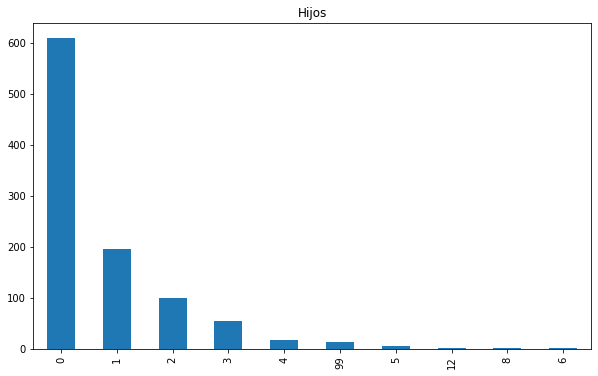

In [11]:
fig = plt.figure(figsize=(10,6))

df.hijos_rec.value_counts().plot(kind='bar')
plt.title('Hijos')

plt.show()

### Grafico provincias
### El siguiente grafico se observar el numero de hombres que hay en cada provincia

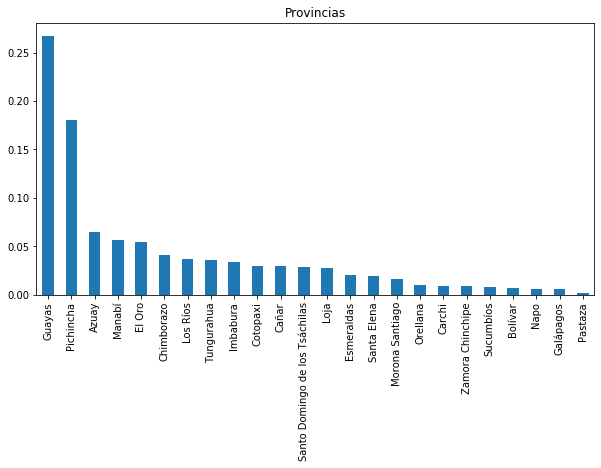

In [12]:
fig = plt.figure(figsize=(10,5))

df.prov_insc.value_counts(normalize = True).plot(kind='bar')
plt.title('Provincias')

plt.show()

### Grafico viudos segun los anios
### En el siguiente grafico se puede ver el numero de hombres viudos segun los anios

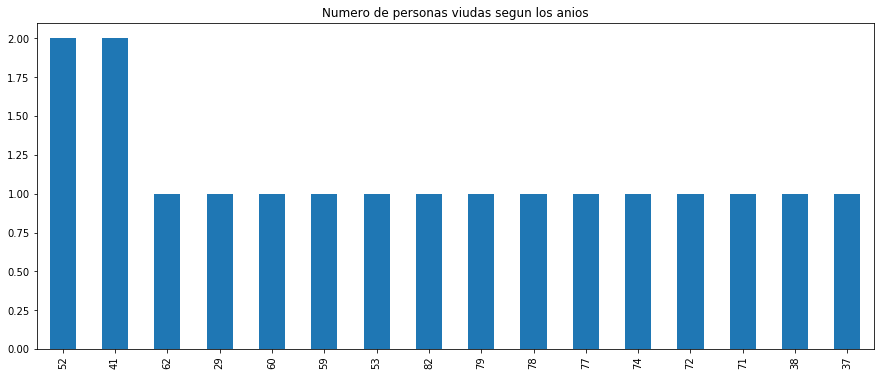

In [13]:
fig = plt.figure(figsize=(15,6))

df.edad_hom[df.est_civih=='Viudo'].value_counts().plot(kind='bar')
plt.title('Numero de personas viudas segun los anios')

plt.show()

### Grafico solteras en cada provincia
### El siguiente grafico muestra el numero de solteros en cada provincia

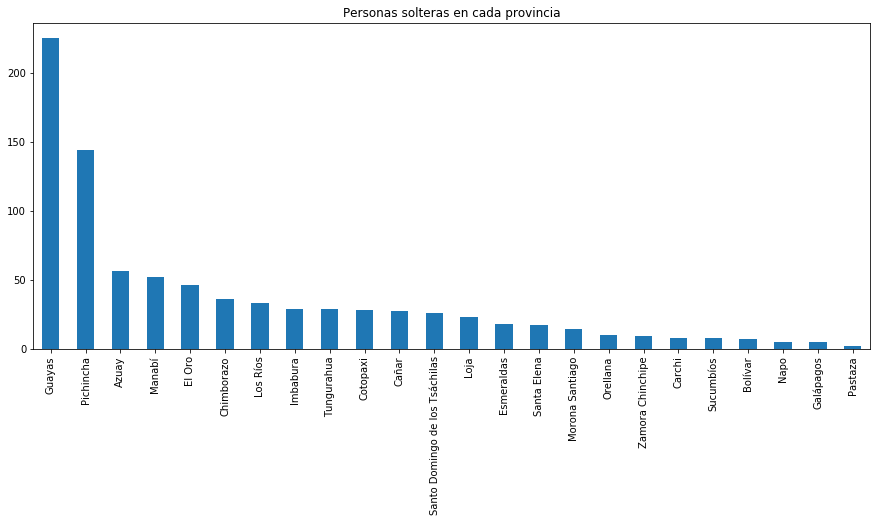

In [14]:
fig = plt.figure(figsize=(15,6))

df.prov_insc[df.est_civih=='Soltero'].value_counts().plot(kind='bar')
plt.title('Personas solteras en cada provincia')

plt.show()

### Hombres viudos maypres a 60 anios
### El grafico a continuacion muestra a hombres viudos maypres a 60 anios como se muestra en la tabla hombres mayores a 60 anios

In [16]:
mayores_60_anios = df[df.edad_hom > 60]
mayores_60_anios



,prov_insc,cant_insc,hijos_rec,anio_nach,mes_nach,dia_nach,edad_hom,est_civih
58,Chimborazo,Cumandá,0,1949,Marzo,17,67,Soltero
122,Azuay,Cuenca,0,1953,Octubre,4,63,Divorciado
144,Guayas,Guayaquil,5,1954,Octubre,19,62,Soltero
152,Guayas,Daule,0,1947,Agosto,1,69,Soltero
155,Guayas,Alfredo Baquerizo Moreno (Juján),0,1940,Diciembre,31,76,Soltero
164,Guayas,El Triunfo,0,1941,Junio,28,75,Soltero
200,Guayas,Guayaquil,0,1948,Julio,24,68,Divorciado
234,Guayas,Milagro,99,1932,Julio,12,84,Divorciado
248,Guayas,Durán,1,1945,Mayo,9,71,Divorciado
252,Guayas,Guayaquil,3,1939,Marzo,10,77,Soltero


C:\Users\kevme\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1080x432 with 0 Axes>

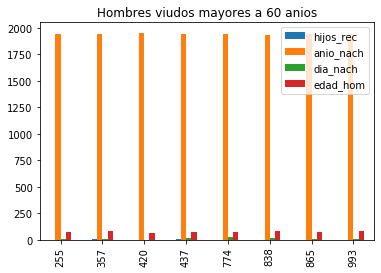

In [17]:
fig = plt.figure(figsize=(15,6))

mayores_60_anios[df.est_civih=='Viudo'].plot(kind='bar')
plt.title('Hombres viudos mayores a 60 anios')

plt.show()


### Hombres solteros que nacieron en 1992
### El grafico a continuacion muestra a hombres solteros que nacieron en 1992, como se muestra en la tabla hombres mayores a 60 anios

In [18]:
anio_nacimiento = df[df.anio_nach == 1992]
anio_nacimiento

,prov_insc,cant_insc,hijos_rec,anio_nach,mes_nach,dia_nach,edad_hom,est_civih
10,Guayas,Guayaquil,0,1992,Abril,11,24,Soltero
34,Pichincha,Quito,0,1992,Junio,19,24,Soltero
40,Cotopaxi,Latacunga,0,1992,Abril,8,24,Soltero
60,Chimborazo,Riobamba,3,1992,Septiembre,12,24,Soltero
101,Orellana,La Joya de los Sachas,0,1992,Agosto,19,24,Soltero
134,El Oro,Pasaje,0,1992,Abril,10,24,Soltero
169,Los Ríos,Babahoyo,0,1992,Diciembre,26,24,Soltero
171,Santa Elena,Salinas,1,1992,Octubre,5,24,Soltero
176,Santa Elena,Salinas,1,1992,Julio,22,24,Soltero
194,Guayas,Guayaquil,1,1992,Septiembre,25,24,Soltero


C:\Users\kevme\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1080x432 with 0 Axes>

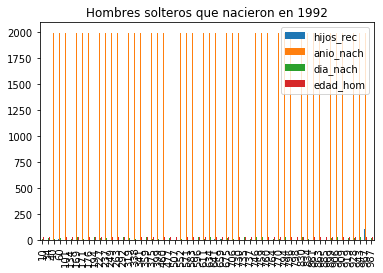

Text(0, 0.5, 'Total de hombres')

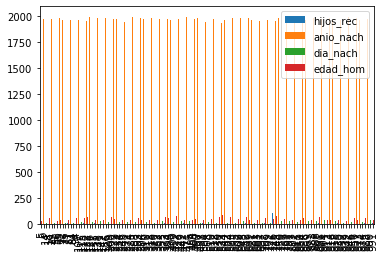

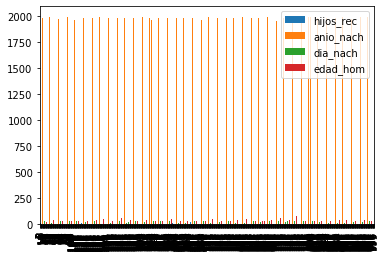

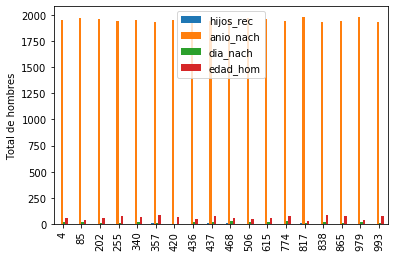

In [19]:
fig = plt.figure(figsize=(15,6))

anio_nacimiento[df.est_civih=='Soltero'].plot(kind='bar')
plt.title('Hombres solteros que nacieron en 1992')

plt.show()


df.groupby('est_civih').plot(kind = 'bar')
plt.ylabel('Total de hombres')

## Conclusiones

# 1) Como se pudo observar en la practica python es una herramienta muy poderosa que nos ayuda en el analisis de datos.

# 2) Python nos permite separar los datos si un archivo es muy grande de la siguiente manera df = df_pickle.iloc[1:1000,:].copy() para que de esta forma sea mas facil el trabajo.

# 3) Los graficos que nos ofrece python nos ayuda a visualizar de una manera mas dinamica los datos que se tengan en los archivos.